In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras.optimizers import adam_v2

%matplotlib inline

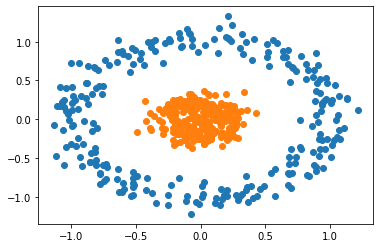

In [2]:
np.random.seed(0)
n_pts = 500
X, y = datasets.make_circles(n_samples=n_pts, random_state = 123, noise=0.1, factor=0.2)

plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])

In [3]:
model = Sequential()
model.add(Dense(4, input_shape=(2,), activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))
model.compile(adam_v2.Adam(learning_rate= 0.01), 'binary_crossentropy', metrics=['accuracy'])
h = model.fit(x=X, y=y, verbose=1, batch_size=20, epochs=100, shuffle='true')

Epoch 1/100
25/25 [==============================] - 0s 910us/step - loss: 0.6987 - accuracy: 0.4960
Epoch 2/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6933 - accuracy: 0.6540
Epoch 3/100
25/25 [==============================] - 0s 984us/step - loss: 0.6931 - accuracy: 0.6080
Epoch 4/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6919 - accuracy: 0.4900
Epoch 5/100
25/25 [==============================] - 0s 915us/step - loss: 0.6914 - accuracy: 0.5680
Epoch 6/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6912 - accuracy: 0.6440
Epoch 7/100
25/25 [==============================] - 0s 902us/step - loss: 0.6896 - accuracy: 0.4320
Epoch 8/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6875 - accuracy: 0.3940
Epoch 9/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6860 - accuracy: 0.6500
Epoch 10/100
25/25 [==============================] - 0s 830us/step - loss: 0.6828 - accuracy: 0.6880

Text(0.5, 0, 'epoch')

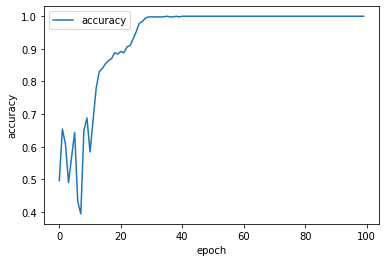

In [4]:
plt.plot(h.history['accuracy'])
plt.legend(['accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

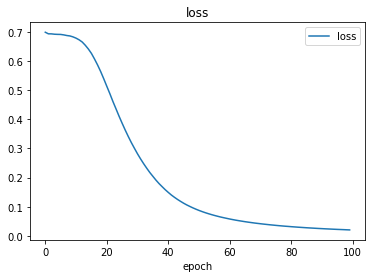

In [5]:
plt.plot(h.history['loss'])
plt.legend(['loss'])
plt.title('loss')
plt.xlabel('epoch')

In [6]:
def plot_decision_boundary(X, y, model):
    x_span = np.linspace(min(X[:,0]) - 0.25, max(X[:,0]) + 0.25)
    y_span = np.linspace(min(X[:,1]) - 0.25, max(X[:,1]) + 0.25)
    xx, yy = np.meshgrid(x_span, y_span)
    grid = np.c_[xx.ravel(), yy.ravel()]
    pred_func = model.predict(grid)
    z = pred_func.reshape(xx.shape)
    plt.contourf(xx, yy, z)

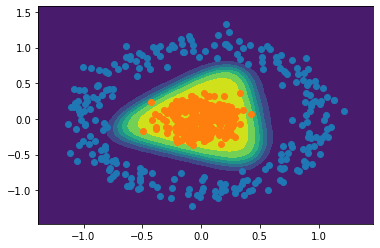

In [7]:
plot_decision_boundary(X, y, model)
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])

Prediction is:  [[0.12551796]]


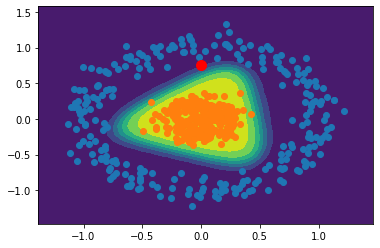

In [8]:
plot_decision_boundary(X, y, model)
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
 
x = 0
y = 0.75
 
point = np.array([[x, y]])
predict = model.predict(point)
plt.plot([x], [y], marker='o', markersize=10, color="red")
print("Prediction is: ", predict)